# Main Analysis


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data loading and sources

In [2]:
#orders
url = "https://drive.google.com/file/d/1m7aEaFy1FeX-i8KT7DMcf4wUvF61g8CX/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_avg_diff_paid_no_outliers = pd.read_csv(path)

#categorized products
url = "https://drive.google.com/file/d/1ogn334NgO79iuZ6D-XzcQ8N5i6_AYmhP/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
product_category_df = pd.read_csv(path)


#orders-orderlines-products
url = "https://drive.google.com/file/d/1JHiv2JP-39A_N65_Xxb6N1zJGoxZCgI1/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
final_joined_df = pd.read_csv(path)

# orders_avg_diff_paid_no_outliers = pd.read_csv("../data/quality-assessed-data/orders_avg_diff_paid_no_outliers.csv", dtype=str)
#
# product_category_df = pd.read_csv("../data/categorized-data/product_category_df.csv")
#
# final_joined_df = pd.read_csv("../data/categorized-data/final_joined_df.csv", dtype=str)

### Convert the number columns to numeric and Data time columns to datetime

In [3]:
final_joined_df["price"] = pd.to_numeric(final_joined_df["price"])
final_joined_df["unit_price"] = pd.to_numeric(final_joined_df["unit_price"])
final_joined_df["unit_price_total"] = pd.to_numeric(final_joined_df["unit_price_total"])
final_joined_df["product_quantity"] = pd.to_numeric(final_joined_df["product_quantity"])
final_joined_df["total_paid"] = pd.to_numeric(final_joined_df["total_paid"])
# the difference is coming from total_paid - order_total_paid (It's different from the discount per each item in order)
final_joined_df["difference"] = pd.to_numeric(final_joined_df["difference"])
final_joined_df["discount"] = pd.to_numeric(final_joined_df["discount"])
final_joined_df["discount_pct"] = pd.to_numeric(final_joined_df["discount_pct"])

# Preparing date values
final_joined_df["created_date"] = pd.to_datetime(final_joined_df["created_date"], errors="coerce")
# Derive year / quarter labels ---
final_joined_df["year"] = final_joined_df["created_date"].dt.year
final_joined_df["quarter"] = final_joined_df["created_date"].dt.quarter
final_joined_df["quarter"] = final_joined_df["created_date"].dt.quarter
final_joined_df["year_quarter"] = final_joined_df["created_date"].dt.to_period("Q").astype(str)  # e.g., '2017Q1'
final_joined_df["month"] = final_joined_df["created_date"].dt.month
final_joined_df["year_month"] = final_joined_df["created_date"].dt.to_period("M").astype(str)  # e.g., '2017-01'
final_joined_df["created_date"] = pd.to_datetime(final_joined_df["created_date"], errors="coerce")
final_joined_df["day"] = final_joined_df["created_date"].dt.date

final_joined_df


,Unnamed: 0,Unnamed: 0.1_x,Unnamed: 0_x,order_id,created_date,total_paid,state,order_price_total,difference,Unnamed: 0.1_y,...,discount,discount_pct,discount_range,discount_range_more_granularity,year,quarter,year_quarter,month,year_month,day
0,0,0,1,241423,2017-11-06 13:10:02,136.15,Completed,129.16,6.99,123178,...,10.83,7.74,1-15%,6-10%,2017,4,2017Q4,11,2017-11,2017-11-06
1,1,1,2,242832,2017-12-31 17:40:03,15.76,Completed,10.77,4.99,173178,...,7.22,40.13,26-45%,41-45%,2017,4,2017Q4,12,2017-12,2017-12-31
2,2,2,3,243330,2017-02-16 10:59:38,84.98,Completed,77.99,6.99,26113,...,22.00,22.00,16-25%,21-25%,2017,1,2017Q1,2,2017-02,2017-02-16
3,3,3,5,245275,2017-06-28 11:35:37,149.00,Completed,149.00,0.00,71449,...,30.00,16.76,16-25%,16-20%,2017,2,2017Q2,6,2017-06,2017-06-28
4,4,4,6,245595,2017-01-21 12:52:47,112.97,Completed,105.98,6.99,13718,...,50.96,49.02,46-55%,46-50%,2017,1,2017Q1,1,2017-01,2017-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,53226,41696,226549,527042,2018-03-14 11:47:50,18.98,Completed,13.99,4.99,215876,...,21.01,60.03,56-65%,61-65%,2018,1,2018Q1,3,2018-03,2018-03-14
53227,53227,41697,226577,527070,2018-03-14 11:50:48,24.97,Completed,19.98,4.99,215906,...,15.01,60.04,56-65%,61-65%,2018,1,2018Q1,3,2018-03,2018-03-14
53228,53228,41698,226581,527074,2018-03-14 11:51:42,24.97,Completed,19.98,4.99,215911,...,15.01,60.04,56-65%,61-65%,2018,1,2018Q1,3,2018-03,2018-03-14
53229,53229,41699,226603,527096,2018-03-14 11:58:40,34.96,Completed,29.97,4.99,215932,...,15.01,60.04,56-65%,61-65%,2018,1,2018Q1,3,2018-03,2018-03-14


### Total Revenue

In [4]:
total_revenue = final_joined_df['unit_price_total'].sum()
total_revenue

np.float64(7817204.399999999)

### Total Discount

In [5]:
total_discount = final_joined_df['discount'].sum()
total_discount

np.float64(1389927.62)

### Here we are going to categorize the dataset based on category.

and then we :
- summerize each unit_price_total, as Revenue
- count the all order_id as Total Items
- count the unique order_id as Total Order
- count the sku as Total Products
- count the product_quantity as Total Products Items
- mean the unit_price as Average Unit Price
- mean the price as Average Price
- mean the discount as Average Discounts
- mean the discount_pct as Average Discounts Percentage

In [6]:
summary_per_category = (
    final_joined_df
    .groupby("category")
    .agg(
        revenue=("unit_price_total", "sum"),
        total_items=("order_id", "count"),
        total_orders=("order_id", "nunique"),
        total_products=("sku", "count"),
        total_product_sold=("product_quantity", "sum"),
        avg_unit_price=("unit_price", "mean"),
        avg_price=("price", "mean"),
        avg_discount=("discount", "mean"),
        avg_discount_pct=("discount_pct", "mean")
    )
    .sort_values(by="revenue" , ascending=False)
    .reset_index()
)
summary_per_category

,category,revenue,total_items,total_orders,total_products,total_product_sold,avg_unit_price,avg_price,avg_discount,avg_discount_pct
0,Storage,2813238.48,15211,12900,15211,18186,164.517648,195.980406,31.462757,16.878504
1,Mobile & Accessories,1971959.62,6289,5900,6289,6800,301.585408,333.306903,31.721495,13.529157
2,Displays & Monitors,677007.70,1754,1735,1754,2042,340.257788,399.810901,59.553113,18.715217
3,Audio & Input,568520.19,5326,4931,5326,5862,99.404183,123.918761,24.514578,22.067304
4,Cases & Protection,487963.31,9159,7639,9159,9674,51.741512,68.981979,17.240467,30.599644
5,Cables & Adapters,354740.31,6748,5600,6748,7958,47.825239,60.350943,12.525704,25.553684
6,Professional Tools,278667.24,1541,1515,1541,1732,168.065302,210.060156,41.994854,19.669779
7,Power & Charging,239148.52,3991,3767,3991,4236,57.178168,73.734676,16.556507,23.542152
8,Computers & Laptops,212641.37,719,711,719,748,280.708595,364.502879,83.794284,30.240362
9,Other,110633.41,991,844,991,1173,104.881483,124.469798,19.588315,14.255843


### Categorizing by Year Quarter and Year Month

In [7]:
summary_per_year_quarter = (
    final_joined_df.groupby("year_quarter")
      .agg(
        revenue=("unit_price_total", "sum"),
        total_items=("order_id", "count"),
        total_orders=("order_id", "nunique"),
        total_products=("sku", "count"),
        total_product_sold=("product_quantity", "sum"),
        avg_unit_price=("unit_price", "mean"),
        avg_price=("price", "mean"),
        avg_discount=("discount", "mean"),
        avg_discount_pct=("discount_pct", "mean")
      )
      .sort_values(by="year_quarter")
)
summary_per_year_quarter

,revenue,total_items,total_orders,total_products,total_product_sold,avg_unit_price,avg_price,avg_discount,avg_discount_pct
year_quarter,,,,,,,,,
2017Q1,961560.19,8823,6805,8823,10013,100.944655,122.212586,21.279046,23.153047
2017Q2,845881.28,5756,4440,5756,6725,131.289135,152.241129,20.951994,16.863330
2017Q3,1366908.10,9315,7052,9315,10429,136.393968,164.345126,27.951158,22.361415
2017Q4,3037096.34,18071,13892,18071,20251,155.433180,184.486171,29.052990,21.104593
2018Q1,1605758.49,11266,8796,11266,12593,131.929620,158.218525,26.295834,21.916299


In [8]:
summary_per_year_month = (
    final_joined_df.groupby("year_month")
      .agg(
        revenue=("unit_price_total", "sum"),
        total_items=("order_id", "count"),
        total_orders=("order_id", "nunique"),
        total_products=("sku", "count"),
        total_product_sold=("product_quantity", "sum"),
        avg_unit_price=("unit_price", "mean"),
        avg_price=("price", "mean"),
        avg_discount=("discount", "mean"),
        avg_discount_pct=("discount_pct", "mean")
      )
      .sort_values(by="year_month")
)
summary_per_year_month

,revenue,total_items,total_orders,total_products,total_product_sold,avg_unit_price,avg_price,avg_discount,avg_discount_pct
year_month,,,,,,,,,
2017-01,604091.87,6008,4597,6008,6808,93.937903,115.520489,21.600077,24.865117
2017-02,332612.30,2600,2045,2600,2964,116.933077,137.981500,21.048423,19.536812
2017-03,24856.02,215,163,215,241,103.394279,118.492791,15.098512,19.049814
2017-04,228090.63,1875,1460,1875,2115,111.661520,129.908181,18.246661,18.264720
2017-05,331214.98,2148,1651,2148,2564,134.496299,154.364162,19.867863,15.397854
2017-06,286575.67,1733,1329,1733,2046,148.549833,173.772579,25.222747,17.163526
2017-07,599404.93,4137,3074,4137,4631,135.615620,165.038064,29.422444,24.982311
2017-08,379560.32,2702,2098,2702,3027,130.018664,157.724774,27.706110,20.490848
2017-09,387942.85,2476,1880,2476,2771,144.651680,170.411971,25.760291,20.023623


In [9]:
summary_per_day = (
    final_joined_df.
    groupby("day", dropna=True)
      .agg(
        revenue=("unit_price_total", "sum"),
        total_items=("order_id", "count"),
        total_orders=("order_id", "nunique"),
        total_products=("sku", "count"),
        total_product_sold=("product_quantity", "sum"),
        avg_unit_price=("unit_price", "mean"),
        avg_price=("price", "mean"),
        avg_discount=("discount", "mean"),
        avg_discount_pct=("discount_pct", "mean")
      )
    )
summary_per_day

,revenue,total_items,total_orders,total_products,total_product_sold,avg_unit_price,avg_price,avg_discount,avg_discount_pct
day,,,,,,,,,
2017-01-01,16343.03,121,96,121,135,118.922397,143.550331,24.627934,20.758347
2017-01-02,37928.64,369,285,369,431,95.889539,111.769185,16.159837,16.822962
2017-01-03,35696.76,307,262,307,325,113.988046,131.729088,17.741042,19.627394
2017-01-04,16463.16,129,115,129,145,123.870620,139.850543,15.979922,17.596047
2017-01-05,11996.38,153,126,153,169,72.813922,124.996209,52.182288,37.621765
...,...,...,...,...,...,...,...,...,...
2018-03-10,8382.58,79,54,79,84,104.856076,132.256582,27.400506,23.208861
2018-03-11,9135.05,74,63,74,81,117.780405,147.796622,30.016216,21.270000
2018-03-12,24040.12,143,125,143,163,150.533706,179.350839,28.817133,19.108741


### Categorizing by discount ranges

In [10]:
summary_per_discount_range = (
    final_joined_df.groupby("discount_range")
      .agg(
        revenue=("unit_price_total", "sum"),
        total_items=("order_id", "count"),
        total_orders=("order_id", "nunique"),
        total_products=("sku", "count"),
        total_product_sold=("product_quantity", "sum"),
        avg_unit_price=("unit_price", "mean"),
        avg_price=("price", "mean"),
        avg_discount=("discount", "mean"),
        avg_discount_pct=("discount_pct", "mean")
      )
      .sort_values(by="discount_range")
      .reset_index()
)
summary_per_discount_range

,discount_range,revenue,total_items,total_orders,total_products,total_product_sold,avg_unit_price,avg_price,avg_discount,avg_discount_pct
0,0 - No Discount,577456.93,3832,3557,3832,4346,139.242586,132.153296,-7.089290,-2.645454
1,1-15%,4157735.36,18595,16539,18595,20833,209.139683,226.688689,17.549006,8.533382
2,16-25%,1986645.33,13992,12870,13992,15910,128.117080,159.591754,31.474674,19.769741
3,26-45%,897936.84,10827,9897,10827,12000,75.343040,109.520187,34.177148,32.486944
4,46-55%,96481.15,2188,2111,2188,2474,40.980608,82.005644,41.025037,49.770644
5,56-65%,54473.06,1967,1862,1967,2400,25.117123,61.466070,36.348948,59.437509
6,66-75%,27770.97,1031,992,1031,1129,24.750980,81.276537,56.525558,68.991242
7,75%+,18704.76,799,759,799,919,20.681339,96.507880,76.287804,80.363074


### Categorizing by discount ranges, more granularity

In [11]:
discount_order = [
    "0 - No Discount",
    "1-5%", "6-10%", "11-15%", "16-20%", "21-25%",
    "26-30%", "31-35%", "36-40%", "41-45%", "46-50%",
    "51-55%", "56-60%", "61-65%", "66-70%", "71-75%",
    "76-80%", "81-85%", "86-90%", "91-95%", "96%+"
]
summary_per_discount_range_more_granularity = (
    final_joined_df.groupby("discount_range_more_granularity")
      .agg(
        revenue=("unit_price_total", "sum"),
        total_items=("order_id", "count"),
        total_orders=("order_id", "nunique"),
        total_products=("sku", "count"),
        total_product_sold=("product_quantity", "sum"),
        avg_unit_price=("unit_price", "mean"),
        avg_price=("price", "mean"),
        avg_discount=("discount", "mean"),
        avg_discount_pct=("discount_pct", "mean")
      )
      .sort_values(by="discount_range_more_granularity")
      .reset_index()
)

summary_per_discount_range_more_granularity["discount_range_more_granularity"] = pd.Categorical(
    summary_per_discount_range_more_granularity["discount_range_more_granularity"],
    categories=discount_order,
    ordered=True
)

summary_per_discount_range_more_granularity = summary_per_discount_range_more_granularity.sort_values(
    "discount_range_more_granularity"
).reset_index(drop=True)

summary_per_discount_range_more_granularity

,discount_range_more_granularity,revenue,total_items,total_orders,total_products,total_product_sold,avg_unit_price,avg_price,avg_discount,avg_discount_pct
0,0 - No Discount,577456.93,3832,3557,3832,4346,139.242586,132.153296,-7.089290,-2.645454
1,1-5%,1564107.08,4609,4427,4609,5062,320.696158,329.486038,8.789881,2.906965
2,6-10%,1117549.45,6356,5965,6356,7192,160.465368,173.375557,12.910189,7.638757
3,11-15%,1476078.83,7630,7263,7630,8579,182.299598,209.003929,26.704332,12.677339
4,16-20%,1092934.05,7675,7292,7675,8629,130.549595,158.280710,27.731115,17.630190
5,21-25%,893711.28,6317,6044,6317,7281,125.161634,161.184640,36.023006,22.369242
6,26-30%,493079.41,4579,4389,4579,5098,97.849784,134.795506,36.945722,27.258589
7,31-35%,241898.25,2971,2872,2971,3277,73.692514,108.659367,34.966853,32.396850
8,36-40%,97379.20,1579,1549,1579,1755,56.103673,89.754750,33.651077,37.332609
9,41-45%,65579.98,1698,1634,1698,1870,35.428015,61.246596,25.818581,42.237827


### Categorizing per brand

In [12]:
summary_per_brands = (
    final_joined_df
    .groupby("brand")
    .agg(
        revenue=("unit_price_total", "sum"),
        total_items=("order_id", "count"),
        total_orders=("order_id", "nunique"),
        total_products=("sku", "count"),
        total_product_sold=("product_quantity", "sum"),
        avg_unit_price=("unit_price", "mean"),
        avg_price=("price", "mean"),
        avg_discount=("discount", "mean"),
        avg_discount_pct=("discount_pct", "mean")
    )
    .sort_values(by="revenue", ascending=False)
    .reset_index()
)
summary_per_brands

,brand,revenue,total_items,total_orders,total_products,total_product_sold,avg_unit_price,avg_price,avg_discount,avg_discount_pct
0,Apple,2580058.18,10183,8892,10183,11156,244.910770,272.315273,27.404504,16.510864
1,Pack,463774.36,1602,1582,1602,1710,281.650705,369.743365,88.092659,26.117622
2,OWC,456317.84,3415,3195,3415,3857,123.587303,153.201886,29.614583,22.186401
3,LaCie,454136.87,1980,1928,1980,2130,215.544217,240.471672,24.927455,11.509848
4,Western Digital,365381.41,1770,1677,1770,2404,151.463226,185.619186,34.155960,18.205836
...,...,...,...,...,...,...,...,...,...,...
172,Retrak Utopia,29.69,1,1,1,1,29.690000,39.990000,10.300000,25.760000
173,BodyGuardz,27.99,1,1,1,1,27.990000,39.990000,12.000000,30.010000
174,Opulus,17.89,2,2,2,2,8.945000,39.990000,31.045000,77.630000
175,Mistify,13.99,1,1,1,1,13.990000,14.990000,1.000000,6.670000


### Categorizing per Products

In [13]:
summary_per_products = (
    final_joined_df
    .groupby("sku")
    .agg(
        name=("name", "first"),
        category=("category", "first"),
        revenue=("unit_price_total", "sum"),
        total_product_sold=("product_quantity", "sum"),
        avg_unit_price=("unit_price", "mean"),
        avg_price=("price", "mean"),
        avg_discount=("discount", "mean"),
        avg_discount_pct=("discount_pct", "mean"),

    )
    .sort_values(by="revenue", ascending=False)
    .reset_index()
)
summary_per_products

,sku,name,category,revenue,total_product_sold,avg_unit_price,avg_price,avg_discount,avg_discount_pct
0,LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",Displays & Monitors,135375.83,239,567.157463,599.00,31.842537,5.315124
1,APP2446,Apple iPhone 6 32GB Space Gray,Mobile & Accessories,104560.64,270,387.286500,449.33,62.043500,13.809346
2,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,Audio & Input,86473.26,537,161.114012,179.00,17.885988,9.994207
3,APP2477,Apple iPhone 64GB Space Gray 8,Mobile & Accessories,85301.93,108,789.956765,809.00,19.043235,2.354412
4,APP1970,Apple iPhone 32GB Space Gray,Mobile & Accessories,80715.76,223,362.026864,419.00,56.973136,13.597773
...,...,...,...,...,...,...,...,...,...
5093,BOO0066,Booq Boa Skin XS iPad Case Purple / Gray,Cases & Protection,4.29,1,4.290000,14.95,10.660000,71.300000
5094,PUR0107,Puro Just Cavalli Swan iPhone Case Passion / 5...,Cases & Protection,3.99,1,3.990000,19.99,16.000000,80.040000
5095,KIN0125,Kingston 8GB Micro SDHC Class 10 45MB / s,Storage,3.99,1,3.990000,4.99,1.000000,20.040000
5096,NTE0087-A,Open - NewerTech Cable HDMI to HDMI 1.4A 090m,Computers & Laptops,2.82,1,2.820000,9.95,7.130000,71.660000


In [14]:
# # store the summary dataframes in csv files
# summary_per_category.to_csv("../data/export-analyzed-data/summary_per_category.csv")
# summary_per_brands.to_csv("../data/export-analyzed-data/summary_per_brands.csv")
# summary_per_products.to_csv("../data/export-analyzed-data/summary_per_products.csv")
# summary_per_discount_range.to_csv("../data/export-analyzed-data/summary_per_discount_range.csv")
# summary_per_discount_range_more_granularity.to_csv("../data/export-analyzed-data/summary_per_discount_range_more_granularity.csv")
# summary_per_year_quarter.to_csv("../data/export-analyzed-data/summary_per_year_quarter.csv")
# summary_per_year_month.to_csv("../data/export-analyzed-data/summary_per_year_month.csv")
# summary_per_day.to_csv("../data/export-analyzed-data/summary_per_day.csv")

## Now Let's plot our categorization

### Revenue per Category


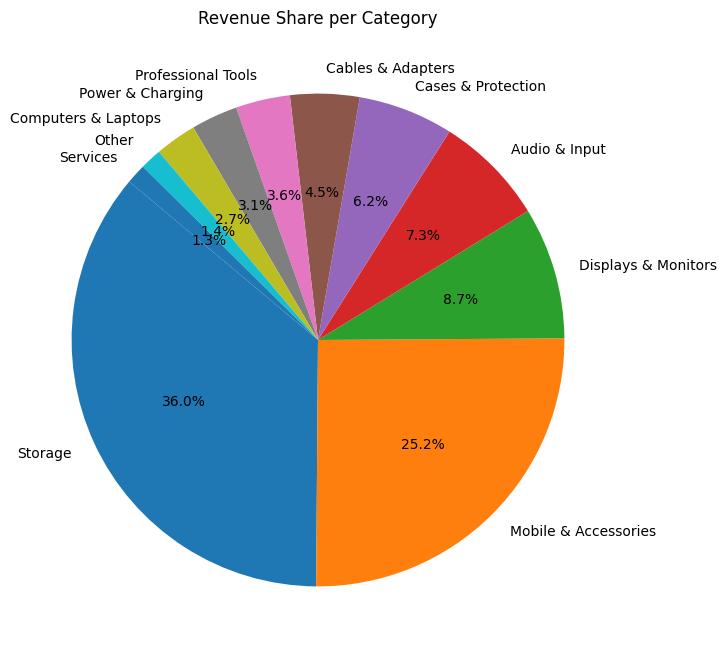

In [15]:
# Pie chart
plt.figure(figsize=(10,8))
plt.pie(
    summary_per_category["revenue"],
    labels=summary_per_category["category"],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Revenue Share per Category")
plt.show()


### Revenue in Top 10 Brands


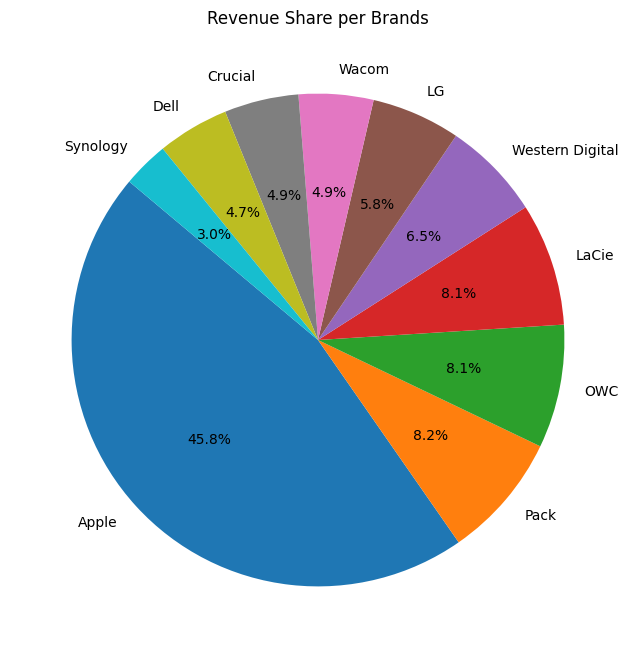

,brand,revenue,total_items,total_orders,total_products,total_product_sold,avg_unit_price,avg_price,avg_discount,avg_discount_pct
0,Apple,2580058.18,10183,8892,10183,11156,244.910770,272.315273,27.404504,16.510864
1,Pack,463774.36,1602,1582,1602,1710,281.650705,369.743365,88.092659,26.117622
2,OWC,456317.84,3415,3195,3415,3857,123.587303,153.201886,29.614583,22.186401
3,LaCie,454136.87,1980,1928,1980,2130,215.544217,240.471672,24.927455,11.509848
4,Western Digital,365381.41,1770,1677,1770,2404,151.463226,185.619186,34.155960,18.205836
5,LG,328723.82,701,694,701,780,422.837118,470.465920,47.628802,10.236705
6,Wacom,276070.46,1626,1590,1626,1816,158.415566,199.674237,41.258672,19.914170
7,Crucial,274923.82,1688,1588,1688,2070,140.046244,163.138217,23.091973,13.630184
8,Dell,265147.84,604,604,604,746,366.229089,444.841705,78.612616,17.144040
9,Synology,171064.85,525,510,525,553,313.016095,321.641333,8.625238,2.581314


In [16]:
# Pie chart
top10_brands = summary_per_brands.head(10)
plt.figure(figsize=(10,8))
plt.pie(
    top10_brands["revenue"],
    labels=top10_brands["brand"],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Revenue Share per Brands")
plt.show()

top10_brands

### Revenue in Top 10 Products


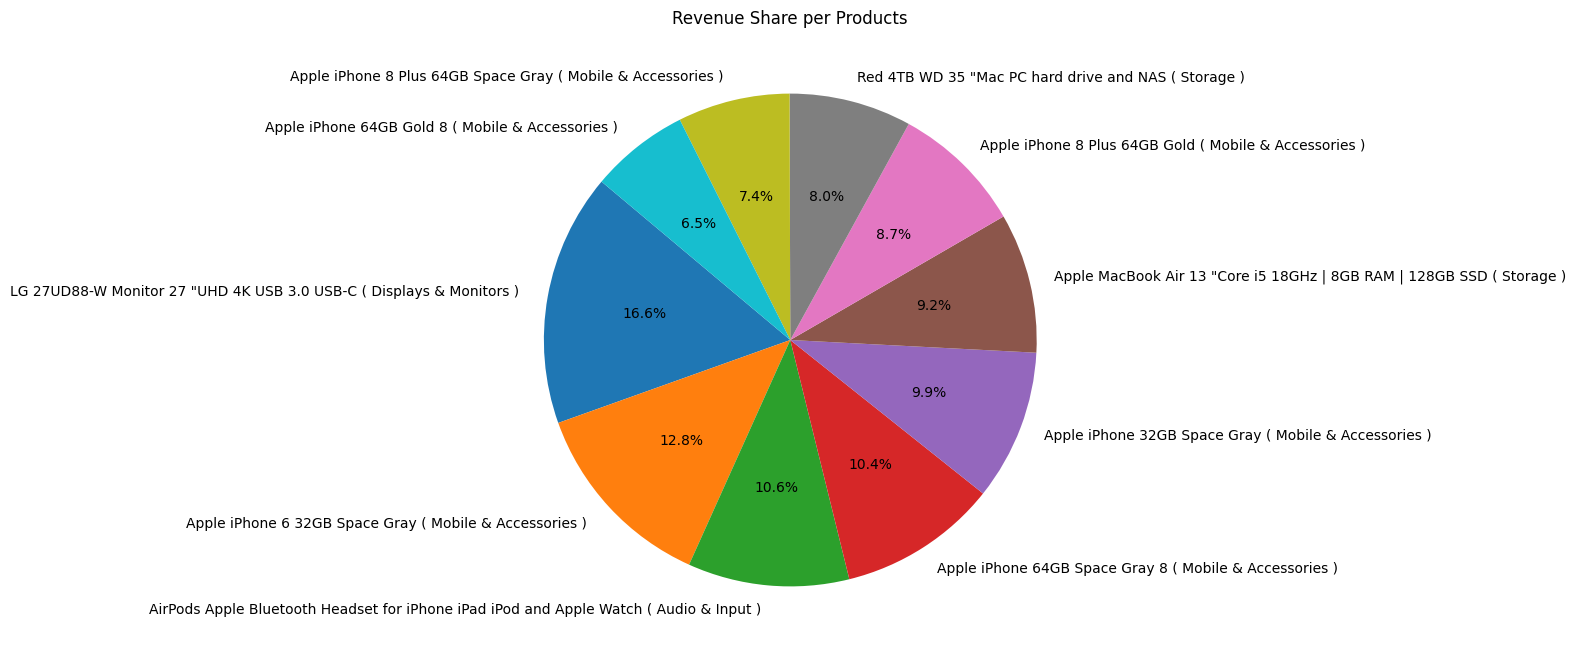

,sku,name,category,revenue,total_product_sold,avg_unit_price,avg_price,avg_discount,avg_discount_pct
0,LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",Displays & Monitors,135375.83,239,567.157463,599.00,31.842537,5.315124
1,APP2446,Apple iPhone 6 32GB Space Gray,Mobile & Accessories,104560.64,270,387.286500,449.33,62.043500,13.809346
2,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,Audio & Input,86473.26,537,161.114012,179.00,17.885988,9.994207
3,APP2477,Apple iPhone 64GB Space Gray 8,Mobile & Accessories,85301.93,108,789.956765,809.00,19.043235,2.354412
4,APP1970,Apple iPhone 32GB Space Gray,Mobile & Accessories,80715.76,223,362.026864,419.00,56.973136,13.597773
5,APP2072,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM ...",Storage,74964.06,77,973.887763,1105.59,131.702237,11.909605
6,APP2485,Apple iPhone 8 Plus 64GB Gold,Mobile & Accessories,70721.79,79,895.163974,919.00,23.836026,2.593462
7,WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Storage,65589.96,476,137.976747,169.00,31.023253,18.355882
8,APP2483,Apple iPhone 8 Plus 64GB Space Gray,Mobile & Accessories,60090.08,67,895.954355,919.00,23.045645,2.507258
9,APP2479,Apple iPhone 64GB Gold 8,Mobile & Accessories,52981.19,67,790.730152,809.00,18.269848,2.258939


In [17]:
# Pie chart
top10_products = summary_per_products.head(10)
plt.figure(figsize=(10,8))
plt.pie(
    top10_products["revenue"],
    labels=(top10_products["name"] + " ( " + top10_products["category"] + " ) " ),
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Revenue Share per Products")
plt.show()

top10_products

## Total Product items per Category

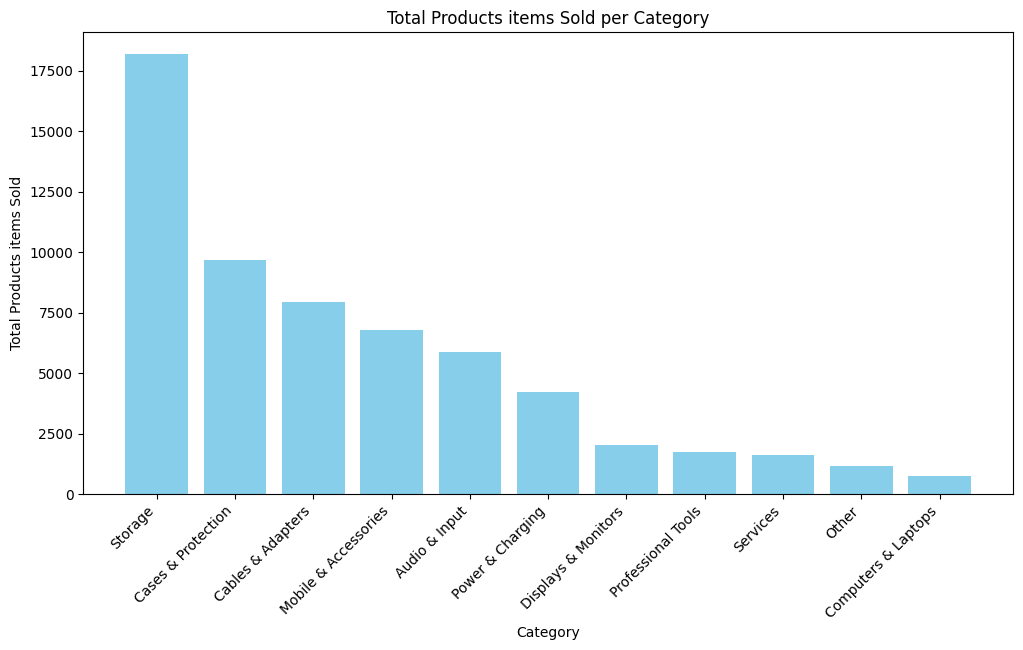

In [18]:
summary_per_category_sorted_by_products = summary_per_category.sort_values(by="total_product_sold", ascending=False)
plt.figure(figsize=(12,6))
(plt.bar
 (summary_per_category_sorted_by_products["category"],
  summary_per_category_sorted_by_products["total_product_sold"],
  color="skyblue"))

plt.xticks(rotation=45, ha="right")
plt.xlabel("Category")
plt.ylabel("Total Products items Sold")
plt.title("Total Products items Sold per Category")
plt.show()


### Revenue in different discount rangs

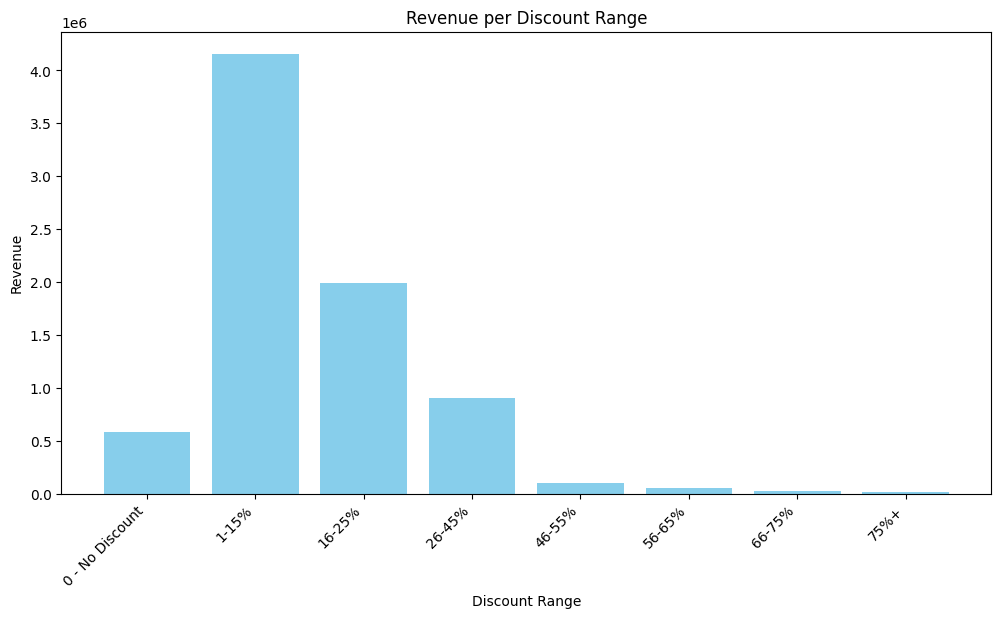

In [19]:
plt.figure(figsize=(12,6))
(plt.bar
 (summary_per_discount_range["discount_range"],
  summary_per_discount_range["revenue"],
  color="skyblue"))

plt.xticks(rotation=45, ha="right")
plt.xlabel("Discount Range")
plt.ylabel("Revenue")
plt.title("Revenue per Discount Range")
plt.show()


### Revenue in different discounts rangs more granularity

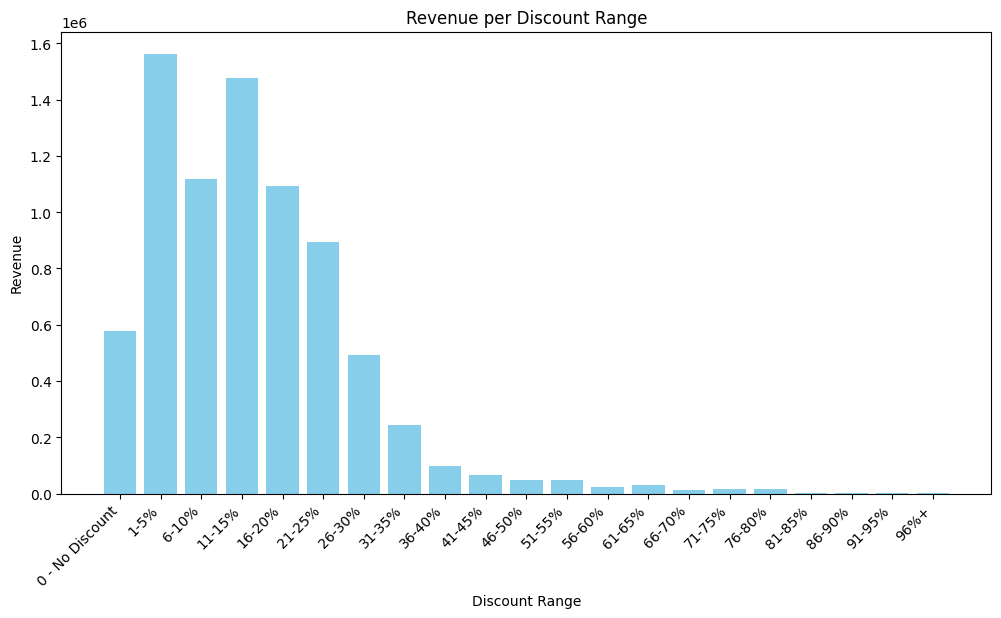

In [20]:
plt.figure(figsize=(12,6))
(plt.bar
 (summary_per_discount_range_more_granularity["discount_range_more_granularity"],
  summary_per_discount_range_more_granularity["revenue"],
  color="skyblue"))

plt.xticks(rotation=45, ha="right")
plt.xlabel("Discount Range")
plt.ylabel("Revenue")
plt.title("Revenue per Discount Range")
plt.show()


### Total Products have been Sold and Average Discount Per Category

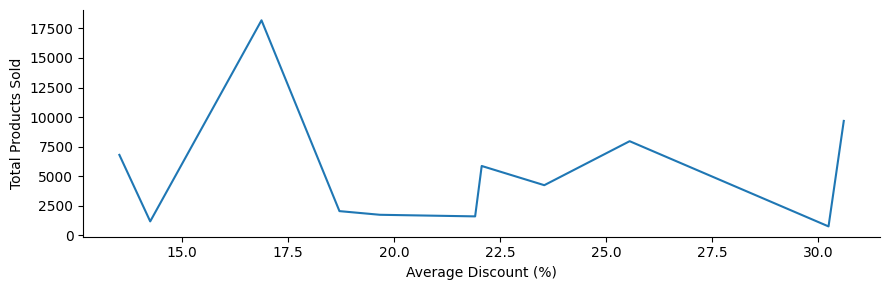

In [21]:
sns.relplot(
    kind="line",
    data=summary_per_category,
    x="avg_discount_pct",
    y="total_product_sold",
    height= 3,
    aspect=3
).set_axis_labels("Average Discount (%)", "Total Products Sold");

### All Products that are in our dataset and all Products that have been sold at least one time in our case study.

In [22]:
unique_product_sold_count = final_joined_df['sku'].nunique()
unique_product_count = product_category_df['sku'].nunique()
print("All Products: " , unique_product_sold_count)
print("All Products that have been sold : ", unique_product_count)

All Products:  5098
All Products that have been sold :  9992


### Revenue per each quarter every year

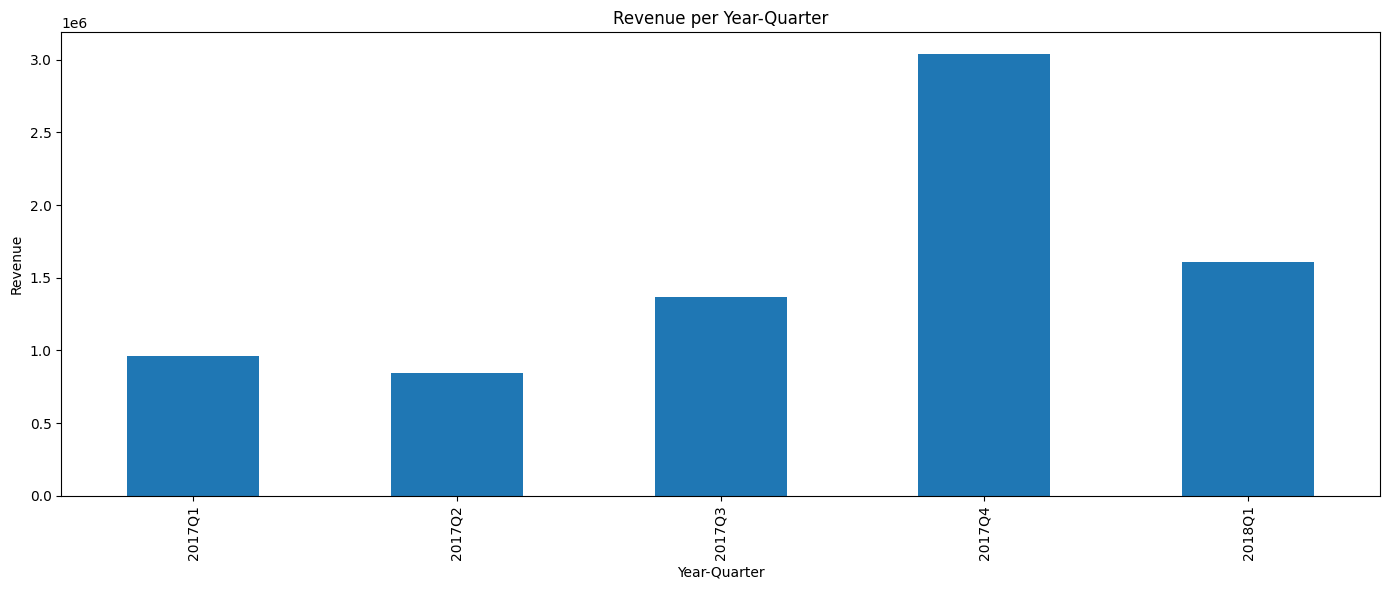

In [23]:
# revenue per year-quarter
plt.figure(figsize=(14, 6))
summary_per_year_quarter["revenue"].plot(kind="bar")
plt.title("Revenue per Year-Quarter")
plt.xlabel("Year-Quarter")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

### Revenue per each month every year

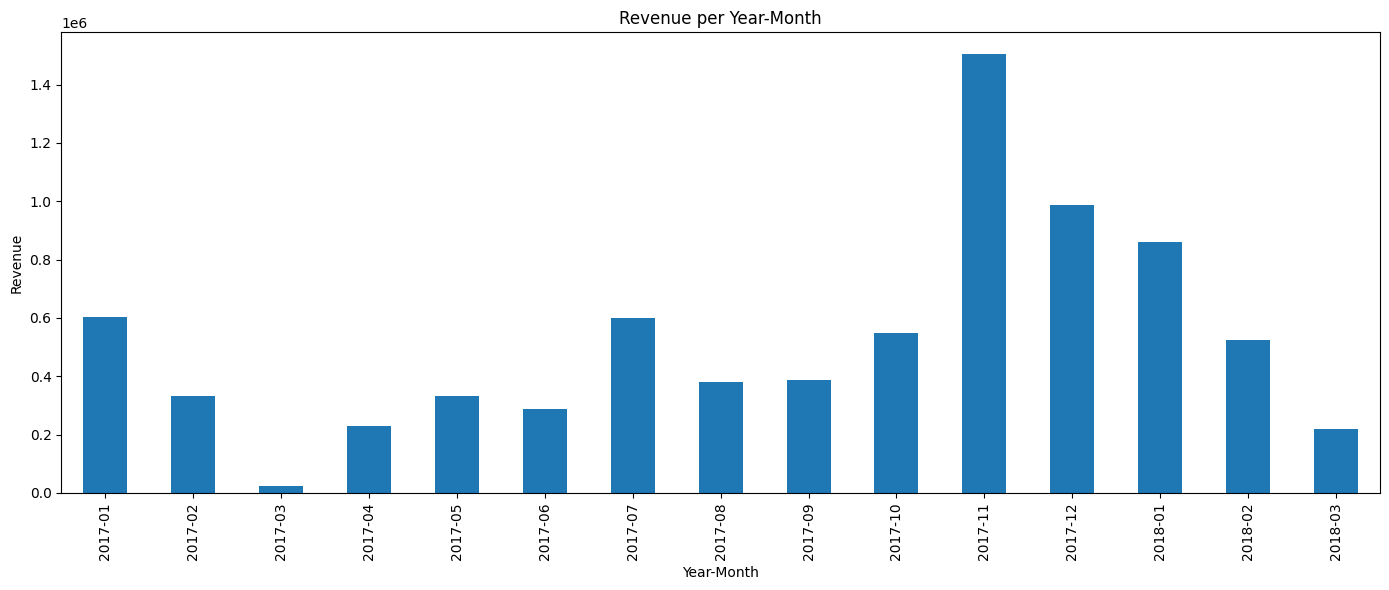

In [24]:
# Plot revenue per year-month ---
plt.figure(figsize=(14, 6))
summary_per_year_month["revenue"].plot(kind="bar")
plt.title("Revenue per Year-Month")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Total Order per each month every year

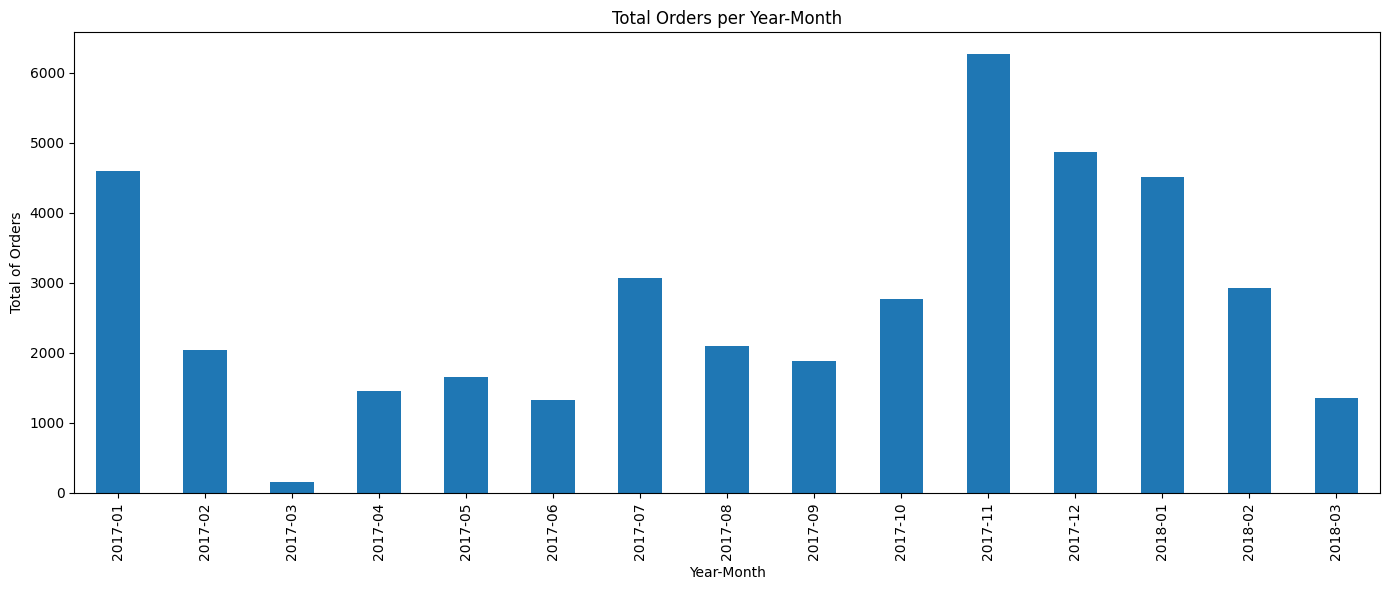

In [25]:

plt.figure(figsize=(14, 6))
summary_per_year_month["total_orders"].plot(kind="bar")
plt.title("Total Orders per Year-Month")
plt.xlabel("Year-Month")
plt.ylabel("Total of Orders")
plt.tight_layout()
plt.show()

### Average Discount per Year-Month

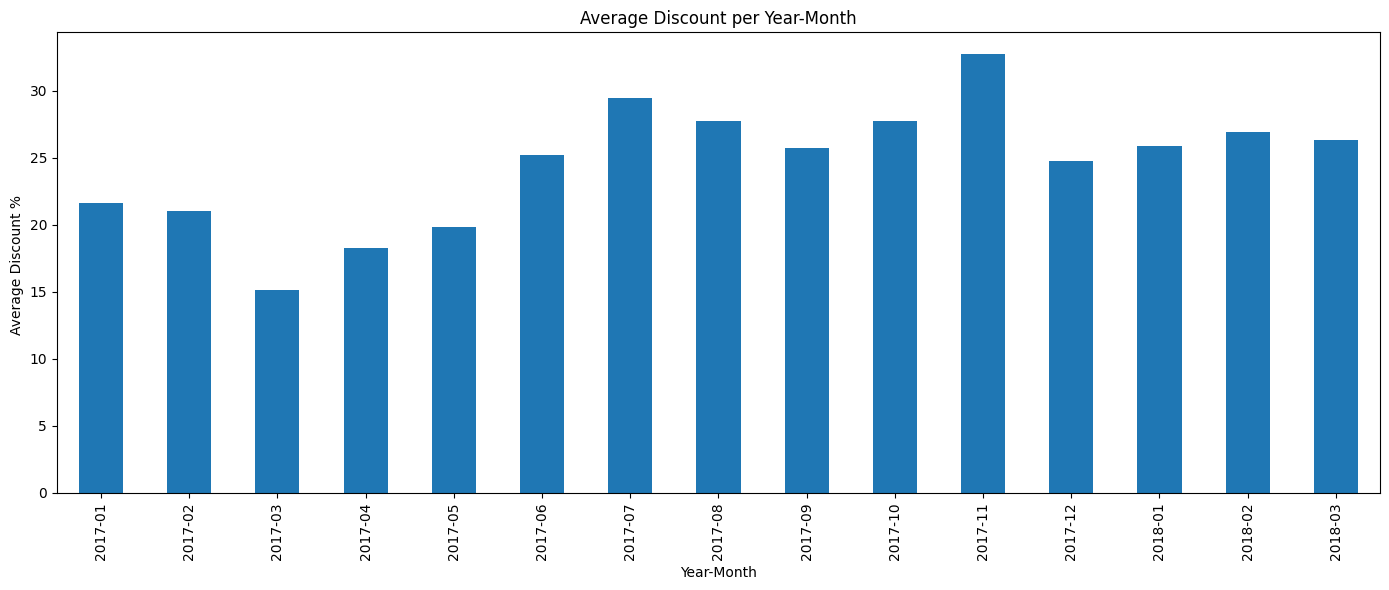

In [26]:
plt.figure(figsize=(14, 6))
summary_per_year_month["avg_discount"].plot(kind="bar")
plt.title("Average Discount per Year-Month")
plt.xlabel("Year-Month")
plt.ylabel("Average Discount % ")
plt.tight_layout()
plt.show()

### Total Monthly Revenue vs average Discount

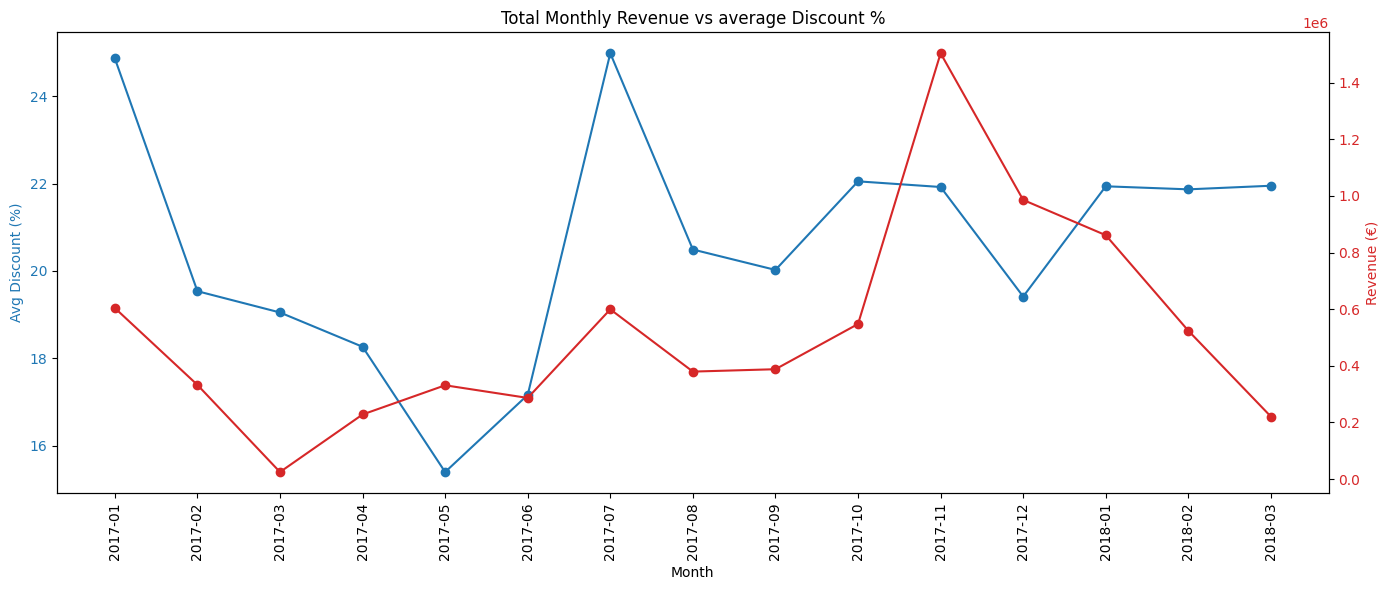

In [27]:
summary_per_year_month = summary_per_year_month.reset_index().rename(columns={"index": "year_month"})
fig, ax1 = plt.subplots(figsize=(14,6))

# Avg Discount %
color = "tab:blue"
ax1.set_xlabel("Month")
ax1.set_ylabel("Avg Discount (%)", color=color)
ax1.plot(
    summary_per_year_month["year_month"],
    summary_per_year_month["avg_discount_pct"],
    marker="o", color=color, label="Avg Discount (%)"
)
ax1.tick_params(axis="y", labelcolor=color)
ax1.set_xticks(range(len(summary_per_year_month)))
ax1.set_xticklabels(summary_per_year_month["year_month"], rotation=90)

# Revenue
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Revenue (€)", color=color)
ax2.plot(
    summary_per_year_month["year_month"],
    summary_per_year_month["revenue"],
    marker="o", color=color, label="Revenue (€)"
)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Total Monthly Revenue vs average Discount %")
fig.tight_layout()
plt.show()


## Comprehensive Analysis of Revenue, Products, and Discount Patterns


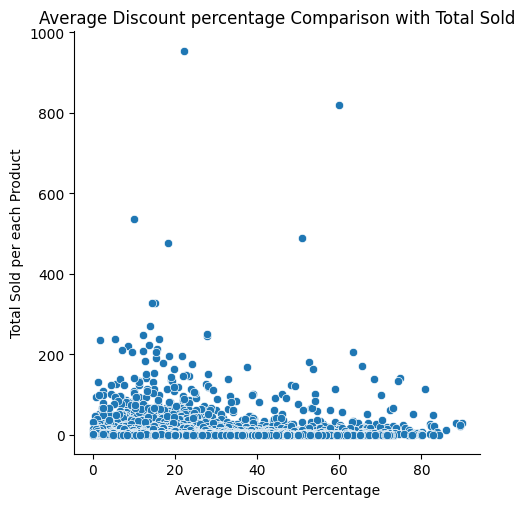

In [28]:
filtered_df = summary_per_products[
    (summary_per_products["avg_discount_pct"] >= 0) &
    (summary_per_products["avg_discount_pct"] <= 100)
]


sns.relplot(
    kind="scatter",
    data=filtered_df,
    x="avg_discount_pct",
    y="total_product_sold"
);
plt.title("Average Discount percentage Comparison with Total Sold")
plt.xlabel("Average Discount Percentage")
plt.ylabel("Total Sold per each Product")
plt.show()

###  Top 10 days by unique order count

In [29]:
top10_days_by_orders = summary_per_day.sort_values("total_orders", ascending=False).head(10)
top10_days_by_orders

,revenue,total_items,total_orders,total_products,total_product_sold,avg_unit_price,avg_price,avg_discount,avg_discount_pct
day,,,,,,,,,
2017-11-24,376560.82,1866,1342,1866,2239,183.353382,220.347824,36.994443,22.574861
2017-11-27,208534.16,1214,891,1214,1330,160.395733,194.918913,34.523180,24.237282
2017-11-23,169388.01,858,614,858,992,176.165117,212.703485,36.538368,23.705396
2017-11-26,129644.83,721,549,721,784,169.900416,209.601803,39.701387,25.384258
2017-11-25,106546.35,611,436,611,705,156.364108,188.976416,32.612308,23.410098
2018-01-02,75227.56,525,401,525,559,136.105905,157.335943,21.230038,19.086857
2017-12-28,62131.16,387,320,387,438,148.876848,176.529974,27.653127,20.862842
2017-12-18,56454.96,375,316,375,403,144.559733,164.524427,19.964693,15.920107
2017-12-19,52708.36,373,301,373,390,138.288660,159.660643,21.371984,16.160670


In [30]:
top10_month_order=summary_per_year_month.sort_values(by="total_orders", ascending=False).head(10)
top10_month_order

,year_month,revenue,total_items,total_orders,total_products,total_product_sold,avg_unit_price,avg_price,avg_discount,avg_discount_pct
10,2017-11,1503718.88,8405,6261,8405,9552,164.190482,196.904731,32.714249,21.921590
11,2017-12,985777.91,6073,4863,6073,6672,152.302928,177.065725,24.762798,19.413980
0,2017-01,604091.87,6008,4597,6008,6808,93.937903,115.520489,21.600077,24.865117
12,2018-01,861249.57,5885,4511,5885,6572,134.980061,160.837007,25.869694,21.937461
6,2017-07,599404.93,4137,3074,4137,4631,135.615620,165.038064,29.422444,24.982311
13,2018-02,523842.96,3738,2931,3738,4145,130.938547,157.888494,26.949946,21.868002
9,2017-10,547599.55,3593,2768,3593,4027,140.238330,167.978063,27.739733,22.050944
7,2017-08,379560.32,2702,2098,2702,3027,130.018664,157.724774,27.706110,20.490848
1,2017-02,332612.30,2600,2045,2600,2964,116.933077,137.981500,21.048423,19.536812
8,2017-09,387942.85,2476,1880,2476,2771,144.651680,170.411971,25.760291,20.023623
